<a href="https://colab.research.google.com/github/dyepes-udea/ia-forest-project/blob/main/03_Modelos_e_iteraciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Volvemos a cargar las librerias y los datos para poder continuar con el procesado de los datos
import pandas as pd
import numpy as np
import random
import requests

In [2]:
import json

data = {"username":"danielyepesmesa","key":"84aa2288a3d961af65fb22e9ccda4433"}
with open('kaggle.json', 'w') as file:
    json.dump(data, file, indent=4)


In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle competitions download forest-cover-type-prediction

 91% 23.0M/25.3M [00:01<00:00, 26.9MB/s]
100% 25.3M/25.3M [00:01<00:00, 17.3MB/s]


In [8]:
#En este paso vamos extraer el CSV que contiene el dataset
!unzip forest-cover-type-prediction.zip

Archive:  forest-cover-type-prediction.zip
  inflating: sampleSubmission.csv    
  inflating: sampleSubmission.csv.zip  
  inflating: test.csv                
  inflating: test.csv.zip            
  inflating: test3.csv               
  inflating: train.csv               
  inflating: train.csv.zip           


In [9]:
df = pd.read_csv("train.csv")
df_forest = df.copy()
df_forest.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [10]:
data_forest = df_forest.dropna() #eliminamos todas las columnas con valores en NaN
data_forest.isnull().sum() #Verificamos si las silas en NaA fueron eliminadas

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [11]:
means_vector = data_forest.iloc[:,[1,2,3,4,5,6,7,8,9,10]].mean().round(1).to_list()
means_vector

[2749.3, 156.7, 16.5, 227.2, 51.1, 1714.0, 212.7, 219.0, 135.1, 1511.1]

In [12]:
columns_means = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", 
                 "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
columns_bool = ["Wilderness_Area1" ,"Wilderness_Area2" ,"Wilderness_Area3" ,"Wilderness_Area4" ,"Soil_Type1" ,"Soil_Type2" ,"Soil_Type3" ,
                "Soil_Type4" ,"Soil_Type5" ,"Soil_Type6" ,"Soil_Type7" ,"Soil_Type8" ,"Soil_Type9" ,"Soil_Type10" ,"Soil_Type11" ,"Soil_Type12" ,"Soil_Type13" ,
                "Soil_Type14" ,"Soil_Type15" ,"Soil_Type16" ,"Soil_Type17" ,"Soil_Type18" ,"Soil_Type19" ,"Soil_Type20" ,"Soil_Type21" ,"Soil_Type22" ,
                "Soil_Type23" ,"Soil_Type24" ,"Soil_Type25" ,"Soil_Type26" ,"Soil_Type27" ,"Soil_Type28" ,"Soil_Type29" ,"Soil_Type30" ,"Soil_Type31" ,
                "Soil_Type32" ,"Soil_Type33" ,"Soil_Type34" ,"Soil_Type35" ,"Soil_Type36" ,"Soil_Type37" ,"Soil_Type38" ,"Soil_Type39" ,"Soil_Type40"]

llenamos los NaN con los valores correspondientes, sea un valor booleano o un promedio

In [13]:
aux = 0

for column in columns_means:
  df_forest[column].fillna(value=means_vector[aux], inplace=True)
  aux += 1


for column in columns_bool:
  df_forest[column].fillna(value=random.randint(0,1), inplace=True)

Inicamos el entrenamiento del modelo, lo realizamos cargando las librerias pertinentes

In [14]:
x=df_forest.drop(["Id","Cover_Type"],axis=1)
y=df_forest['Cover_Type']

In [15]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

Queremos determinar cual es el modelo mas apropiado para realizar nuestros entrenamientos

Metodo GaussianoNB

In [16]:
def classification_gs(df_forest,y):
  
    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=GaussianNB().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_gs(x,y)

(0.6008597883597884,
 0.6008597883597884,
 0.6008597883597884,
 0.6008597883597884)

Metodo Bernoulli

In [17]:
def classification_bn(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=BernoulliNB().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_bn(x,y)

(0.6107804232804233,
 0.6107804232804233,
 0.6107804232804233,
 0.6107804232804233)

Metodo de KNeigbors

In [18]:
def classification_kn(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=KNeighborsClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_kn(x,y)

(0.8048941798941799,
 0.8048941798941799,
 0.8048941798941799,
 0.8048941798941799)

Metodo de SVC


In [19]:
def classification_svc(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=SVC().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_svc(x,y)

(0.6256613756613757,
 0.6256613756613757,
 0.6256613756613757,
 0.6256613756613757)

Metodo DecisionTree

In [20]:
def classification_dTree(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


    predict=DecisionTreeClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_dTree(x,y)

(0.7926587301587301,
 0.7926587301587301,
 0.7926587301587301,
 0.7926587301587301)

Metodo de LogisticRegr

In [21]:
def classification_lRegr(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

    predict=LogisticRegression().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_lRegr(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(0.47453703703703703,
 0.47453703703703703,
 0.47453703703703703,
 0.47453703703703703)

Metodo de GradientBoosting

In [22]:

def classification_graBoosting(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

    predict=GradientBoostingClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_graBoosting(x,y)

(0.8022486772486772,
 0.8022486772486772,
 0.8022486772486772,
 0.8022486772486772)

Metodo de RandomForest

In [23]:
def classification_ramForest(df_forest,y):


    x=df_forest
    y=y
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

    predict=RandomForestClassifier().fit(x_train,y_train).predict(x_test)

    accuracy = accuracy_score(y_test,predict)
    precision = precision_score(y_test,predict,average='micro')
    recall = recall_score(y_test,predict,average='micro')
    f1 = f1_score(y_test,predict,average='micro')

    return accuracy, precision, recall, f1

classification_ramForest(x,y)

(0.871031746031746, 0.871031746031746, 0.871031746031746, 0.871031746031746)

Usamos un modelo no supervisado, para analizar los Cover_Types y de que forma estan agrupados en funcion de la distancia hidrologica

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


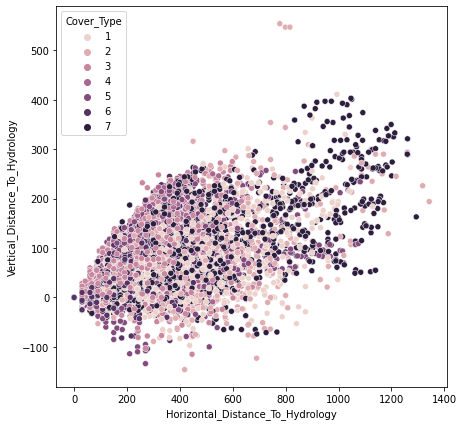

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
sns.scatterplot("Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",hue = "Cover_Type",data = df_forest)

Tenemos 3 metodos que nos dan mayor precisión para el entrenamiento de el modelo

In [25]:
top3Metods = pd.DataFrame(columns=['Acurracy', 'Precision', 'Recall', 'F1'],index=['DecisionTree','GradientBoosting','RandomForest'])
dTree = classification_dTree(x,y)
top3Metods.Acurracy[0] = dTree[0]
top3Metods.Precision[0] = dTree[1]
top3Metods.Recall[0] = dTree[2]
top3Metods.F1[0] = dTree[3]

graBoosting = classification_graBoosting(x,y)
top3Metods.Acurracy[1] = graBoosting[0]
top3Metods.Precision[1] = graBoosting[1]
top3Metods.Recall[1] = graBoosting[2]
top3Metods.F1[1] = graBoosting[3]

RamForest = classification_ramForest(x,y)
top3Metods.Acurracy[2] = RamForest[0]
top3Metods.Precision[2] = RamForest[1]
top3Metods.Recall[2] = RamForest[2]
top3Metods.F1[2] = RamForest[3]


top3Metods.head()

,Acurracy,Precision,Recall,F1
DecisionTree,0.792328,0.792328,0.792328,0.792328
GradientBoosting,0.802249,0.802249,0.802249,0.802249
RandomForest,0.871362,0.871362,0.871362,0.871362


Como podemos observar el metodo de mayor precisión es el RandomForest, por lo tanto este sera nuestro modelo

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,random_state=70)

model = RandomForestClassifier(n_estimators=70)
model.fit(x_train,y_train)

model.score(x_test,y_test)*100

86.37566137566137

Importamos el dataset para testing

In [27]:
df_test = pd.read_csv("test.csv")
df.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [28]:
predict=model.predict(df_test.drop(labels=['Id'],axis=1))

submission= pd.DataFrame(data = predict,columns = ['Cover_Type'])
submission.head(100)


,Cover_Type
0,2
1,2
2,2
3,2
4,2
...,...
95,2
96,2
97,2
98,2


In [29]:
submission['Id'] =df_test["Id"]
submission.set_index('Id',inplace=True)
submission.to_csv('submission.csv')